# Final Projects


## Contents
* [Introduction](#itr) 
  + [Dataset origin](#Dataset-origin)
  + [Dataset Details](#Dataset-Details)
  + [Dataset variable](#Dataset-variable)
  + [Target variable](#Target-variable)
* [Goals](#Goals)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Exploration data analysis](#Exploration-data-analysis)
* [Model evaluation](#Model-evaluation)
* [Conclusion](#Conclusion)
)


## Introduction <a id='itr'></a>

### Dataset Source

(a) Origin:  This dataset was taken from the StatLib library which is
            maintained at Carnegie Mellon University. The dataset was 
            used in the 1983 American Statistical Association Exposition.
            
(b) Date: July 7, 1993


### Dataset Details

"The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)

1. Number of Instances: 398

2. Number of Attributes: 9 including the class attribute

3. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

4. Missing Attribute Values:  horsepower has 6 missing values



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
from sklearn import preprocessing
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
matplotlib.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('auto-mpg.data', delim_whitespace=True, header=None)
data.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year",
                "origin", "car name"]
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### Dataset variable

The features in our dataset are described in the table below.It has 7 features and 1 target, these descriptions are taken from the UCI data source.

### Target variable

For this project, the target feature in this dataset will be the mpg of a car. That is, the mpg of a car will be predicted based on the explanatory/ descriptive variables.

## Goals

Car is people use of transport every day, for consumer groups, the majority of people want to buy a fuel economy of vehicles, although each car has a corresponding fuel consumption test report, but the fuel consumption value are not real, consumers want to be able to have a smart tool, using the basic parameter of the car, can accurately predict the car's fuel consumption; For automobile manufacturers, they want to be able to provide accurate fuel consumption to consumers, so they also want to have a smart tool, using the basic parameters of the car, can accurately predict the fuel consumption of the car.

In this project, we will use the fuel consumption data of cars to build a regression model and use the basic attributes of cars to accurately predict the real fuel consumption of a certain car. The research content of the project is divided into the following two parts:

(1) EDA exploratory analysis, through outlier detection, missing value check, correlation coefficient and other methods to study the relationship between each variable in the data;

(2) Linear regression, decision tree, random forest and neural network models were used to model the data, and the corresponding regression indicators were used to compare the models;

(3) Select the best machine learning model;

In this project, we will make the following data, and then through EDA exploratory analysis to verify whether our hypothesis is reasonable:

(1) Each feature is independent of each other;

(2) The target value is normal distribution;

(3) There is a strong correlation between the features and the target value

## Data Cleaning and Preprocessing





#### Check for missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [60]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [61]:
np.unique(data['horsepower'])

array(['100.0', '102.0', '103.0', '105.0', '107.0', '108.0', '110.0',
       '112.0', '113.0', '115.0', '116.0', '120.0', '122.0', '125.0',
       '129.0', '130.0', '132.0', '133.0', '135.0', '137.0', '138.0',
       '139.0', '140.0', '142.0', '145.0', '148.0', '149.0', '150.0',
       '152.0', '153.0', '155.0', '158.0', '160.0', '165.0', '167.0',
       '170.0', '175.0', '180.0', '190.0', '193.0', '198.0', '200.0',
       '208.0', '210.0', '215.0', '220.0', '225.0', '230.0', '46.00',
       '48.00', '49.00', '52.00', '53.00', '54.00', '58.00', '60.00',
       '61.00', '62.00', '63.00', '64.00', '65.00', '66.00', '67.00',
       '68.00', '69.00', '70.00', '71.00', '72.00', '74.00', '75.00',
       '76.00', '77.00', '78.00', '79.00', '80.00', '81.00', '82.00',
       '83.00', '84.00', '85.00', '86.00', '87.00', '88.00', '89.00',
       '90.00', '91.00', '92.00', '93.00', '94.00', '95.00', '96.00',
       '97.00', '98.00', '?'], dtype=object)

Output from the above, we can find that, in addition to the horsepower is object, the data type of the other variable data types are correct. There is a missing value of that horsepower. Our output value of horsepower, we found that the values are in the form of a string of horsepower, and contains? There are the missing value, horsepower indeed.

In [62]:
data=data.replace('?',np.nan)
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

We are going to? Become null, then the output variables of missing value, can be seen from the graph, there are six missing value horsepower

#### Deal all the rows with missing values

In [63]:
data['horsepower']=data['horsepower'].astype('float')
data['horsepower'].fillna(data['horsepower'].mean(),inplace=True)
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Due to the small number of samples in this data, in order to provide as many samples as possible for the machine learning model, we need to fill six samples with missing values to ensure the integrity of the data. We use the method of mean padding to deal with missing values. Finally, the missing value is output again, and the result shows that the filling is successful.

#### Drop irrelevant features in our dataset

In [64]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


We output the numerical distribution of each variable. Through variance, mean and other conditions, we find that the distribution among each variable is different. Therefore, we need to normalize the data when conducting linear regression and neural network modeling.

In [66]:
data=data.drop('car name',axis=1)

Since the car name is the name of each vehicle type and has no special significance for modeling, we dropped it.

#### Deal the outliers of some features

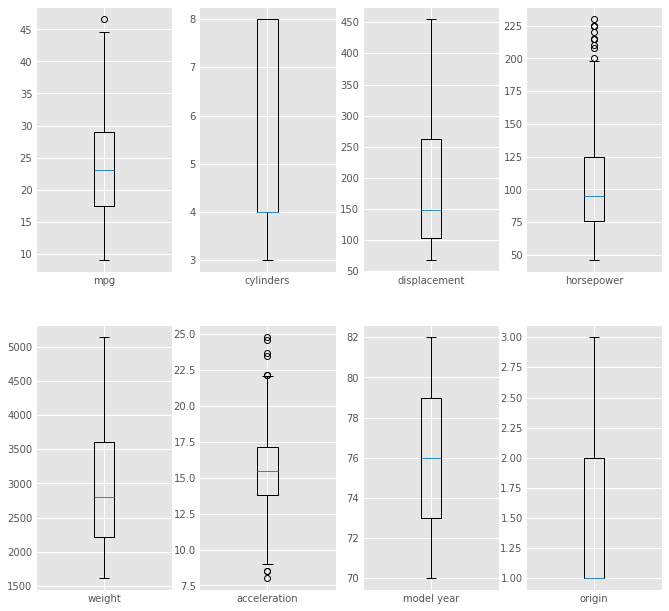

In [67]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))
j=1
for i in data.columns:
    plt.subplot(2,4,j)
    plt.boxplot(
        x=data[i],
        labels=[i]
    )
    j+=1
plt.show()

In order to detect outliers, we use Boxplot method to output the distribution of each variable. Through Boxplot, it is obvious whether each variable contains outliers. As can be seen from the above results, only one outlier MPG, and 'horsepower,' acceleration 'have multiple outliers. For the target value, we do not need to work on it, and for the remaining features, we will work on missing values.

In [68]:
def boxplot_fill(col):
    iqr = col.quantile(0.75)-col.quantile(0.25)
    u_th = col.quantile(0.75) + 1.5*iqr 
    l_th = col.quantile(0.25) - 1.5*iqr 
    def box_trans(x):
        if x > u_th:
            return u_th
        elif x < l_th:
            return l_th
        else:
            return x
    return col.map(box_trans)
co_check=['horsepower','acceleration']
for i in co_check:
    data[i] = boxplot_fill(data[i])

We replace the missing values contained by the features with the upper and lower bounds defined by BoxPlot. The implementation code and associated comments are shown above.

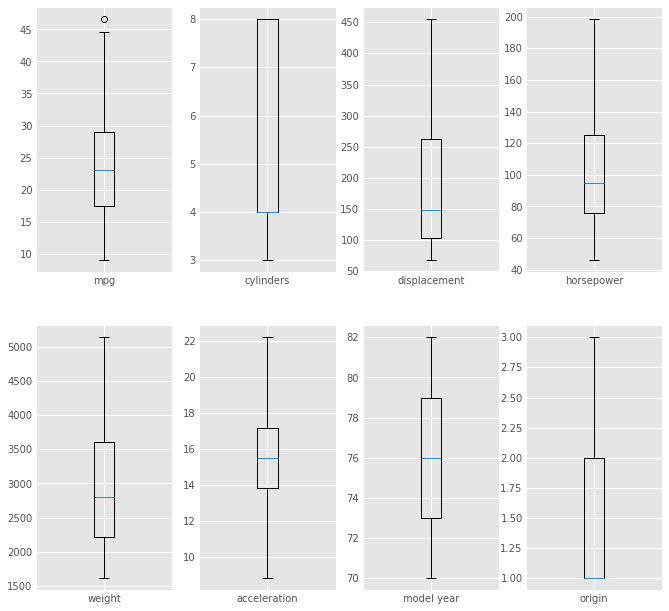

In [69]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))
j=1
for i in data.columns:
    plt.subplot(2,4,j)
    plt.boxplot(
        x=data[i],
        labels=[i]
    )
    j+=1

After outliers processing, we output the boxplot distribution map of each feature again. From the above results, we can see that the repaired feature no longer contains outliers.

## Exploration Data Analysis

Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.

#### Histplot for each variable

Text(0.5, 1.0, 'Histplot for each variable')

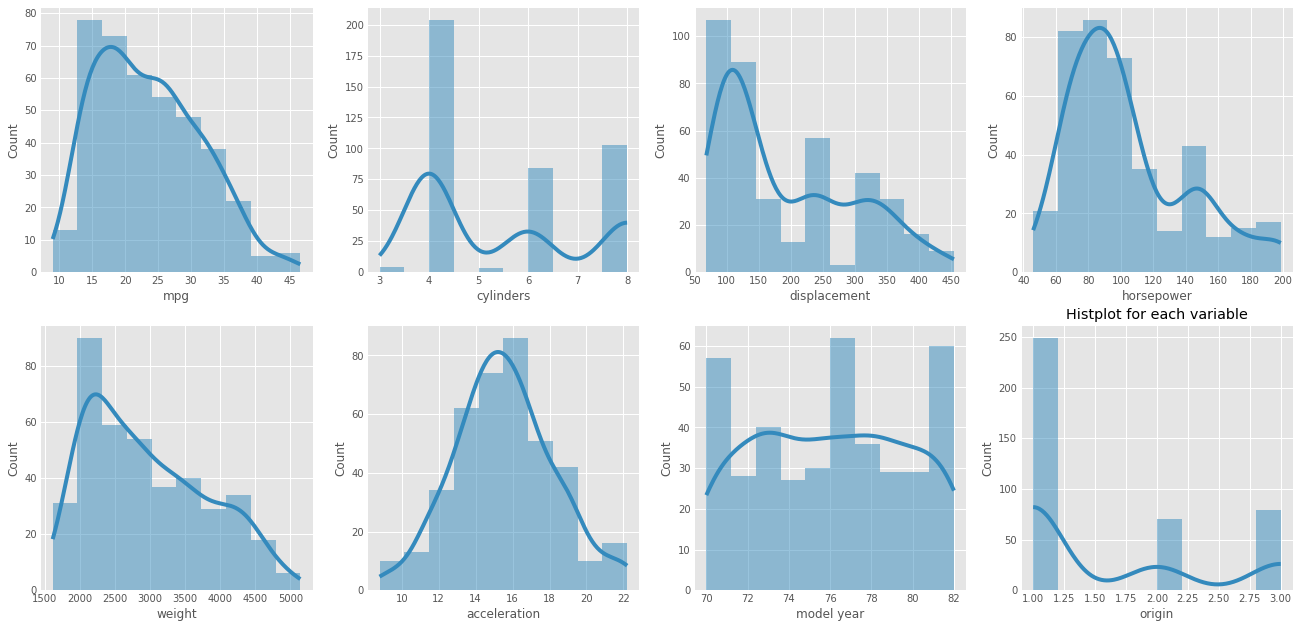

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10)) #Set canvas 2X4
row=0
col=0
columns=list(data.columns)
group=columns
for i in range(len(group)): 
    if col<4:
        sns.histplot(data=data, x=group[i],  bins=10, kde=True, ax=axes[row,col], edgecolor=None)
    else:
        row+=1
        col=0
        sns.histplot(data=data, x=group[i], bins=10, kde=True, ax=axes[row,col], edgecolor=None)
    col+=1

We output the HISTplot distribution map for each variable, as can be seen from the output results. The distribution of MPG is approximately normal, which satisfies the first assumption we mentioned earlier, that in linear regression, the distribution of the target variable is normally distributed. For other features, we found that except for the feature of Accelration, the distribution of the remaining features did not meet the normal distribution, but it did not affect the modeling effect of the linear regression model.

#### scatter plot between each variables

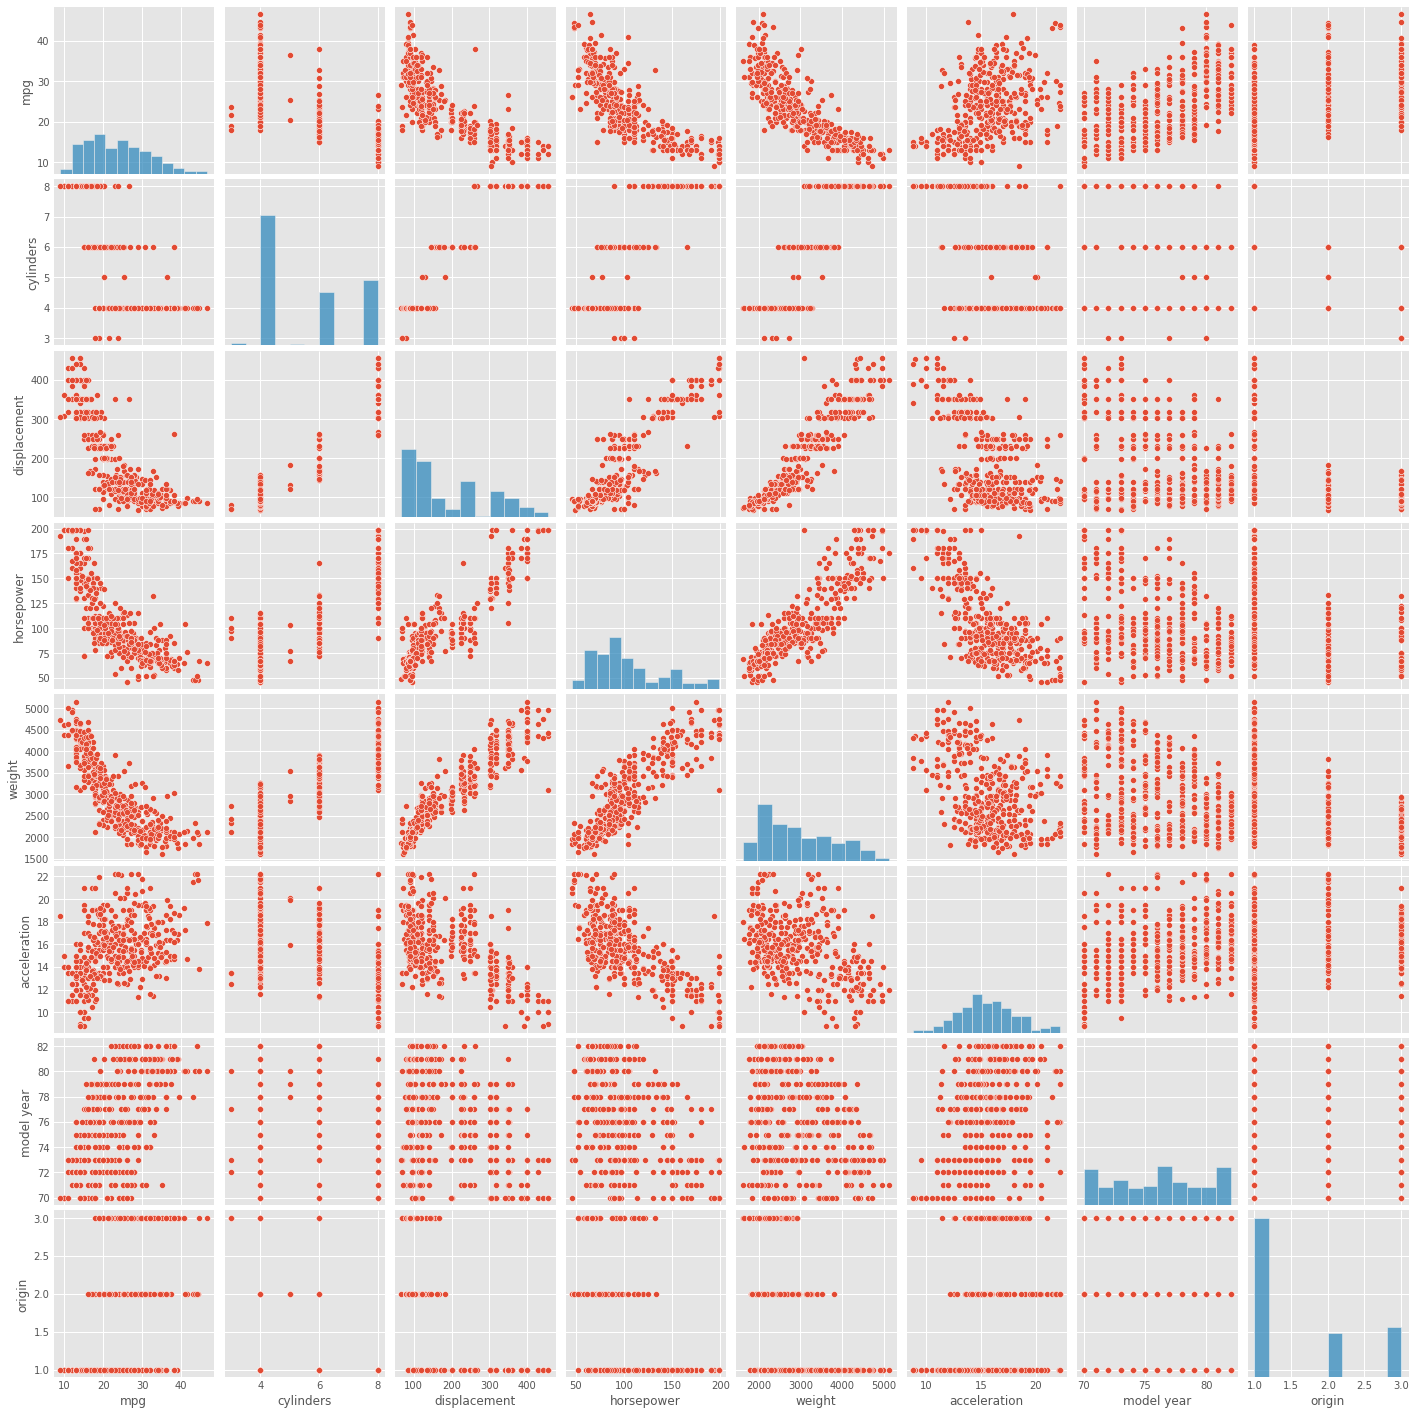

In [54]:
sns.pairplot(data)

To see the scatter plot between each feature, we plot the scatter plot between all the features as a single graph. As can be seen from the above figure, each feature has an obvious linear relationship with the target value, which also satisfies our previous assumption of linear regression model. However, according to the figure above, there is also an obvious linear relationship between different features, such as displacement and cylinders, which indicates that the features of the data are not independent of each other, which violates the assumption of linear regression. Therefore, in subsequent linear regression modeling tasks, The trained model may be affected by multiple linear relationships, which may lead to bias in the fitting results.

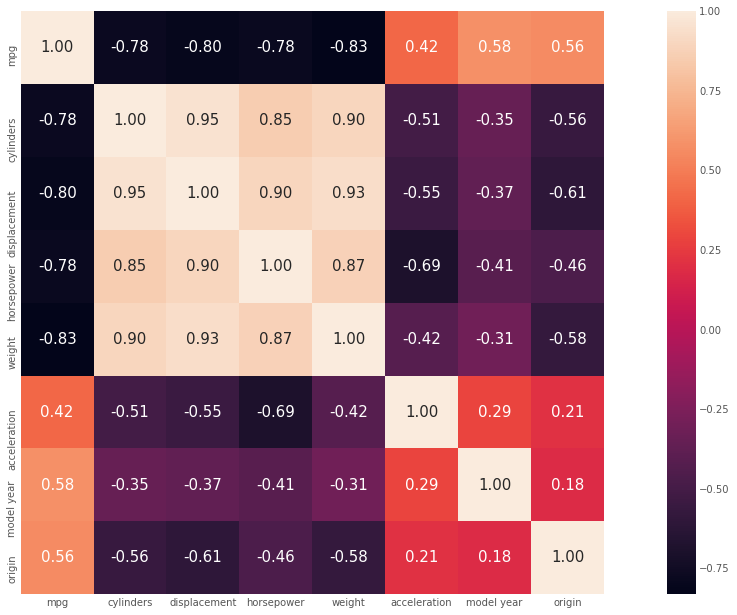

In [15]:
plt.figure(figsize=(20, 10))
cm = np.corrcoef(data.values.T) 
hm = sns.heatmap(cm, 
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':15},
                 yticklabels=data.columns,
                 xticklabels=data.columns)

In the figure above, we output the correlation coefficient between each variable. As can be seen from the figure, the correlation coefficient between mpg of the target variable and other features is relatively large, indicating that the correlation between each feature and the target variable is obvious, which will be conducive to the modeling of linear regression model. At the same time, we also see that there is a relatively large correlation coefficient among other features, indicating that the data has the characteristics of multiple linearity, which is consistent with the conclusion of the scatter distribution diagram analyzed above.

### Model evaluation

In [20]:
x=data.drop('mpg',axis=1)
y=data['mpg']
x_train, x_test ,y_train, y_test= train_test_split(x, y,test_size=0.2, shuffle=True)
s=StandardScaler()
s.fit(x_train)
x_train_scale=s.transform(x_train)
x_test_scale=s.transform(x_test)

We split the training set and the data set with a ratio of 8:2. At the same time, we also used shuffle to shuffle the data to ensure the generalization ability of the model training. Since we will use the gradient descent model, we need to normalize the features to ensure the stable convergence of the model.

In [24]:
def get_metrics(model,x_train, x_test ,y_train, y_test):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    mse=round(mean_squared_error (pred, y_test),2)
    rmse=round(np.sqrt(mse),2)
    mae=round(mean_absolute_error (pred, y_test),2)
    return mse,rmse,mae,model
    

We define the function of regression indicators to calculate the mse, rmse and mae values of each model output, and we will use these indicators to compare the training results of each model

#### Linear regression model

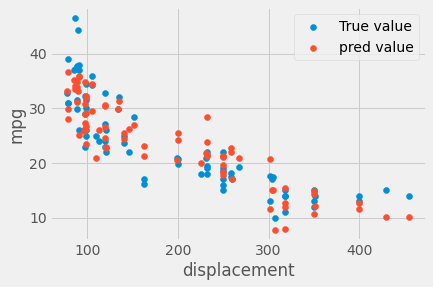

In [48]:
MSE=[]
RMSE=[]
MAE=[]
model=linear_model.LinearRegression() #Linear regression
mse,rmse,mae,model=get_metrics(model,x_train_scale, x_test_scale ,y_train, y_test)
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
pred=model.predict(x_test_scale)
plt.scatter(x_test['displacement'],y_test,label='True value')
plt.scatter(x_test['displacement'],pred,label='pred value')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.legend()

The above figure shows the fitting results of the linear regression model. We plot the comparison between the predicted results of the model in the test set and the real results. As can be seen from the figure, the predicted value is basically consistent with the real value, but for some high real values, the predicted value is difficult to predict, which may be caused by the failure of the multiple linearity assumption.

#### DecisionTree model

In [49]:
parms_grid={
    'max_depth':range(1,20,2),
    'max_leaf_nodes':range(2,20,2),
}
dc =DecisionTreeRegressor()
model = GridSearchCV(dc,parms_grid, cv=5)
model.fit(x_train, y_train)

print(model.best_params_)

{'max_depth': 9, 'max_leaf_nodes': 12}


Since the decision tree has multiple parameters, we adjust the parameters for max_depth and max_leaf_nodes, and use gridsearch and 10-fold cross validation methods. The final best parameter combination is:
{'max_depth': 9, 'max_leaf_nodes': 12}

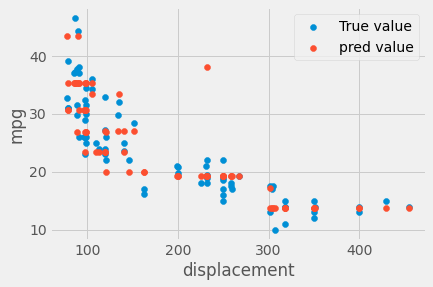

In [50]:
dc=DecisionTreeRegressor(max_depth=model.best_params_['max_depth'],max_leaf_nodes=model.best_params_['max_leaf_nodes'])
mse,rmse,mae,model=get_metrics(dc,x_train, x_test ,y_train, y_test)
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
pred=model.predict(x_test)
plt.scatter(x_test['displacement'],y_test,label='True value')
plt.scatter(x_test['displacement'],pred,label='pred value')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.legend()

The above figure shows the fitting results of the decision tree model. We have plotted the comparison between the prediction results of the model in the test set and the real results. As can be seen from the figure, the predicted values are basically distributed in a straight line. Since decision trees are trained on tree models, it is difficult to predict continuous value variables and easy to change the predicted values into discrete distributions.

#### RandomForest model

In [51]:
parms_grid={
    'n_estimators':[200,400,600,1000],
    'max_depth':[10,15,20],
}
rf =RandomForestRegressor()
model = GridSearchCV(rf,parms_grid, cv=5)
model.fit(x_train, y_train)

print(model.best_params_)

{'max_depth': 10, 'n_estimators': 400}


Since random forest has multiple parameters, we adjusted n_estimators and max_depth, and used gridsearch and 10-fold cross validation methods. The final best parameter combination is:
{'max_depth': 10, 'n_estimators': 400}

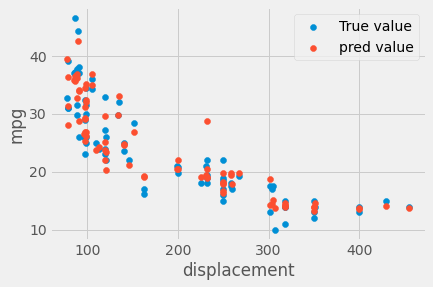

In [52]:
rf=RandomForestRegressor(n_estimators=200,max_depth=20)
mse,rmse,mae,model=get_metrics(rf,x_train, x_test ,y_train, y_test)
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
pred=model.predict(x_test)
plt.scatter(x_test['displacement'],y_test,label='True value')
plt.scatter(x_test['displacement'],pred,label='pred value')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.legend()

The above figure shows the fitting results of the random forest model. We plot the prediction results of the model in the test set compared with the real results. As can be seen from the figure, the predicted value is in good agreement with the real value, and the result is stronger than that of linear regression. Because random Forest adopts boosting ensemble learning, the prediction accuracy is higher than that of a single machine learning model in most cases.

#### MLP model

In [53]:
parms_grid={
    'hidden_layer_sizes':[(100,),(100,200),(100,200,300)],
    'activation':['tanh','relu'],
}
mlp =MLPRegressor()
model = GridSearchCV(mlp,parms_grid, cv=5,n_jobs=2)
model.fit(x_train_scale, y_train)

print(model.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': (100, 200, 300)}


Since the neural network model has multiple parameters, we adjusted the parameters to hidden_layer_sizes and hidden_layer_sizes, and used gridsearch and 10-fold cross validation methods. The final best parameter combination is:
{'activation': 'tanh', 'hidden_layer_sizes': (100, 200, 300)}

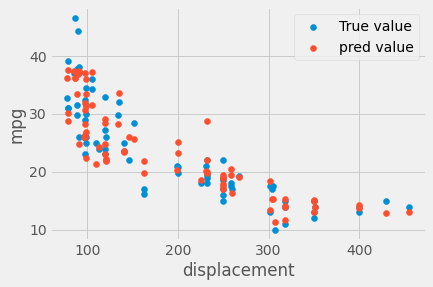

In [54]:
mlp= MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 200, 300))
mse,rmse,mae,model=get_metrics(mlp,x_train_scale, x_test_scale ,y_train, y_test)
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
pred=model.predict(x_test_scale)
plt.scatter(x_test['displacement'],y_test,label='True value')
plt.scatter(x_test['displacement'],pred,label='pred value')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.legend()

The above figure shows the fitting results of the neural network model. We have plotted the comparison between the prediction results of the model in the test set and the real results. As can be seen from the figure, the predicted value is in good agreement with the real value, and the result is stronger than the linear regression, but worse than the random forest.

In [55]:
column_metris=['mse','rmse','mae']
index1=['linear','decision','forest','mlp']
results=pd.DataFrame(np.array([MSE,RMSE,MAE]).T,columns=column_metris)
results.index=index1
results.sort_values(by='mse')

,mse,rmse,mae
forest,5.89,2.43,1.76
mlp,7.52,2.74,1.96
linear,11.12,3.33,2.52
decision,12.82,3.58,2.46


The figure above outputs the index results of mse, rmse, and mae for the four models on the test set. It can be seen from the figure that random Forest and mlp models perform best. Random Forest and mlp are both good machine learning models, which can have good training effect on linear and nonlinear data and have strong generalization ability. When the data feature dimension is small and the amount of data is small, the effect of random forest will be better. However, in the case of high latitude and large amount of data, neural network can extract features more effectively, and the training effect will be better.

## Summary and Conclusions



As for the models,  It can be seen from the figure that random Forest and mlp models perform best. Random Forest and mlp are both good machine learning models, which can have good training effect on linear and nonlinear data and have strong generalization ability. When the data feature dimension is small and the amount of data is small, the effect of random forest will be better. However, in the case of high latitude and large amount of data, neural network can extract features more effectively, and the training effect will be better.

Fuel consumption efficiency is of great significance for the consumer and the manufacturer are, by establishing the model of machine learning, realize the accurate prediction of the efficiency of fuel consumption can provide important basis for consumers in the process of the car, also can provide manufacturers in the process of making cars with rapid fuel consumption efficiency value, improve the efficiency. 